# Regression Excercise
Julian Lopes Hinz, SoSe 2023

# 1. **Import Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. **Load Data**

In [50]:
df=pd.read_csv("./data/Fish.csv")

In [51]:
df.head(100)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
95,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658


# 3. **Preprocessing On Data**

In [52]:
df.shape

(159, 7)

We Should convert column date into Date

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [54]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [55]:
df.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [56]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [57]:
df['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [58]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [59]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

The model cannot be trained with a input type (feature) being a string. Thus we instead need to represent it by a numeric value by reating a new colum for each type of species and assigning it a corresponding boolean value:

In [60]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the "species" column
df['species_encoded'] = label_encoder.fit_transform(df['Species'])

In [61]:
df['species_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: species_encoded, Length: 159, dtype: int64

In [62]:
# Perform One-Hot Encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df['Species'], prefix='Species')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Length1          159 non-null    float64
 3   Length2          159 non-null    float64
 4   Length3          159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
 7   species_encoded  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [64]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            159 non-null    object 
 1   Weight             159 non-null    float64
 2   Length1            159 non-null    float64
 3   Length2            159 non-null    float64
 4   Length3            159 non-null    float64
 5   Height             159 non-null    float64
 6   Width              159 non-null    float64
 7   species_encoded    159 non-null    int64  
 8   Species_Bream      159 non-null    bool   
 9   Species_Parkki     159 non-null    bool   
 10  Species_Perch      159 non-null    bool   
 11  Species_Pike       159 non-null    bool   
 12  Species_Roach      159 non-null    bool   
 13  Species_Smelt      159 non-null    bool   
 14  Species_Whitefish  159 non-null    bool   
dtypes: bool(7), float64(6), int64(1), object(1)
memory usage: 11.2+ KB


Next steps:
1. die df_encoded graphisch darstellen
2. das Model mit einem random split trainieren
3. das Model mit einem artgerechten split trainieren
4. Kommentare zu den Daten

# 4.**Exploratory data analysis**

<Axes: >

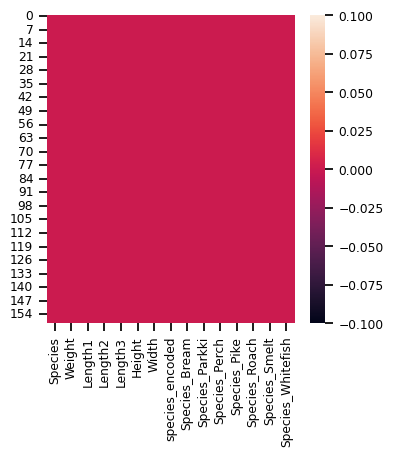

In [65]:
import matplotlib.pyplot  as plt 
import seaborn as sns 
plt.figure(figsize=[4, 4])
sns.heatmap( df_encoded.isna())

# 8.weight correlation matrix

In [66]:
df_encoded = df_encoded.drop('Species', axis=1)

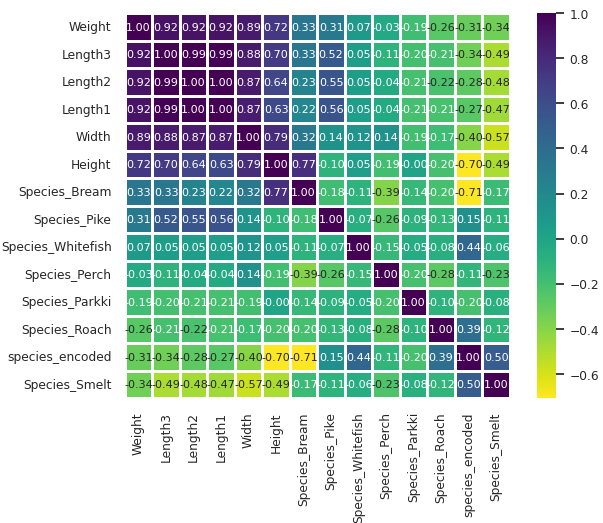

In [67]:
corr = df_encoded.corr()
k = 14 
cols = corr.nlargest(k, 'Weight')['Weight'].index

cm = df_encoded[cols].corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8,
                     cmap="viridis_r", annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)

> Actually it looks like the species isn't even a very important feature for the weight prediction. The highest correlation is achieved with the size-parameters length 1-3, width and height.

> However, since it is not the task to reduce the parameter amount, I will keep them all.

In [68]:
df_encoded.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'species_encoded', 'Species_Bream', 'Species_Parkki', 'Species_Perch',
       'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

---

# **Task 1**

In [69]:
df = df_encoded.copy()

1. **Randomly split dataset with 70/30 training and test dataset**

In [70]:
X = df.drop(['Weight', 'species_encoded'],axis=1) #test data 

y = df['Weight']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=2)

In [72]:
x_train

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
53,25.0,27.0,30.6,8.5680,4.7736,False,False,False,False,True,False,False
28,32.8,36.0,41.6,16.8896,6.1984,True,False,False,False,False,False,False
84,19.0,21.0,22.5,5.6925,3.6675,False,False,True,False,False,False,False
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
27,32.7,36.0,41.5,16.5170,5.8515,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
75,15.0,16.2,17.2,4.5924,2.6316,False,False,True,False,False,False,False
43,20.4,22.0,24.7,5.8045,3.7544,False,False,False,False,True,False,False
22,31.5,34.5,39.7,15.5227,5.2801,True,False,False,False,False,False,False
72,7.5,8.4,8.8,2.1120,1.4080,False,False,True,False,False,False,False


In [73]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (48, 12)
Train Data =  (111, 12)
Target Train =  (111,)
Target Test =  (48,)


In [74]:
y_train

53    272.0
28    850.0
84    125.0
0     242.0
27    714.0
      ...  
75     51.5
43    150.0
22    620.0
72      5.9
15    600.0
Name: Weight, Length: 111, dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)

X_test = std_scale.transform(x_test)
#X_test = pd.DataFrame(X_test, columns=df.columns)

In [76]:
X_train

array([[-0.04108946, -0.04912825,  0.02913045, ...,  2.74562589,
        -0.33166248, -0.23904572],
       [ 0.74771885,  0.79706347,  0.97509544, ..., -0.36421568,
        -0.33166248, -0.23904572],
       [-0.64786508, -0.61325606, -0.66744377, ..., -0.36421568,
        -0.33166248, -0.23904572],
       ...,
       [ 0.6162508 ,  0.65603152,  0.81170149, ..., -0.36421568,
        -0.33166248, -0.23904572],
       [-1.81085169, -1.79792446, -1.84560016, ..., -0.36421568,
        -0.33166248, -0.23904572],
       [ 0.40387933,  0.42097826,  0.59670945, ..., -0.36421568,
        -0.33166248, -0.23904572]])

In [77]:
X_test

array([[ 3.73540547e-01,  3.73967611e-01,  5.27911993e-01,
         1.10689631e+00,  4.19855569e-03,  1.90394328e+00,
        -2.78693206e-01, -7.80189498e-01, -2.59437261e-01,
        -3.64215680e-01, -3.31662479e-01, -2.39045722e-01],
       [ 9.03785909e-02,  1.38914356e-01,  2.78521223e-01,
         8.72325926e-01,  5.48173145e-02,  1.90394328e+00,
        -2.78693206e-01, -7.80189498e-01, -2.59437261e-01,
        -3.64215680e-01, -3.31662479e-01, -2.39045722e-01],
       [-1.41644753e+00, -1.45944778e+00, -1.46721417e+00,
        -1.52661888e+00, -1.85834037e+00, -5.25225731e-01,
        -2.78693206e-01, -7.80189498e-01, -2.59437261e-01,
        -3.64215680e-01,  3.01511345e+00, -2.39045722e-01],
       [ 1.40943226e-01,  2.04729267e-01,  3.64518041e-01,
         1.20268909e+00,  5.30922898e-01,  1.90394328e+00,
        -2.78693206e-01, -7.80189498e-01, -2.59437261e-01,
        -3.64215680e-01, -3.31662479e-01, -2.39045722e-01],
       [ 6.36476649e-01,  6.09020865e-01,  6.4830753

In [78]:
y_train

53    272.0
28    850.0
84    125.0
0     242.0
27    714.0
      ...  
75     51.5
43    150.0
22    620.0
72      5.9
15    600.0
Name: Weight, Length: 111, dtype: float64

2. **Use linear regression, random forest model**


In [79]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [80]:
pred = LR.predict(X_test)

3. **calculate RMSE and R2 in the test set**


In [81]:
from sklearn.metrics import r2_score
print('LineRegression r2_score :', r2_score(y_test, pred))

LineRegression r2_score : 0.9190213040666666


SGDRegressor

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
# Model
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pred2 = sgd.predict(X_test)

In [83]:
from numpy.ma.core import floor
# Performance Measure
sgd_mse = mean_squared_error(y_test, pred2)
sgd_r2 = r2_score(y_test, pred2)

print("MSE =",sgd_mse)
print("R2 = ",floor(sgd_r2*100),"%") 

MSE = 11220.918697846384
R2 =  89.0 %


*Tune model parameters to get high accuracy*

In [84]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import  GridSearchCV
# Define the hyperparameters to tune
params = {
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1]
   
}
# Use GridSearchCV to tune the hyperparameters
grid = GridSearchCV(sgd, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

# Use the best hyperparameters to train the model
sgd = SGDRegressor(**grid.best_params_)
sgd.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
sgd_r3 = r2_score(y_test, y_pred)
print(f"Mean squared error = {mse}")
print(f"R2 = {round(sgd_r3*100)} % ")

{'alpha': 0.01, 'learning_rate': 'constant', 'penalty': 'l2'}
Mean squared error = 11427.211203909734
R2 = 89 % 


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linea

In [85]:
df.drop(['Weight', 'species_encoded'],axis=1).columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

**15.Saving Model And Predict weight**

In [86]:
import pickle
from numpy.ma.core import floor
# Model
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pickle.dump(sgd,open('./data/fish_model_random.pkl','wb'))

model = pickle.load(open('./data/fish_model_random.pkl','rb'))

x=model.predict([[20, 20, 20, 5 , 5, 0, 0, 0,	0, 0, 1, 0]])
print("The predicted  weight = ",x,"g")

The predicted  weight =  [7104.16711523] g


In [87]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

print(rfg_model.score(X_test, y_test)*100,"%")

95.10244146497944 %


# **Task 2**

5. **Change the training-test split setting, with the 70/30 principle for each species. That means, in any of the species, there needs to be 70% of the sample in the training set, and 30% of the sample in the test set.**

In [88]:
df = df_encoded.copy()

In [89]:
X = df.drop(['Weight', 'species_encoded'],axis=1) #test data 

y = df['Weight']

In [90]:
# Sort for each species
X_Bream = df[df['Species_Bream']]
X_Parkki = df[df['Species_Parkki']]
X_Perch = df[df['Species_Perch']]
X_Pike = df[df['Species_Pike']]
X_Roach = df[df['Species_Roach']]
X_Smelt = df[df['Species_Smelt']]
X_Whitefish = df[df['Species_Whitefish']]



In [91]:
from sklearn.model_selection import train_test_split


# Sort for each species
Bream = df[df['Species_Bream']]
Parkki = df[df['Species_Parkki']]
Perch = df[df['Species_Perch']]
Pike = df[df['Species_Pike']]
Roach = df[df['Species_Roach']]
Smelt = df[df['Species_Smelt']]
Whitefish = df[df['Species_Whitefish']]

new_dfs = [Parkki, Perch, Pike, Roach, Smelt, Whitefish]

X = Bream.drop(['Weight', 'species_encoded'],axis=1)  
y = Bream['Weight']
x_train_sum,x_test_sum,y_train_sum,y_test_sum=train_test_split(X,y,test_size=0.3, random_state=2)


for new_df in new_dfs:
    X = new_df.drop(['Weight', 'species_encoded'],axis=1)  
    y = new_df['Weight']
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=2)
    
    x_train_sum = x_train_sum.merge(x_train)
    x_test_sum = x_test_sum.merge(x_test)
    y_train_sum = pd.concat([y_train_sum, y_train])
    y_test_sum = pd.concat([y_test_sum, y_test])


> I just do not get to combine the split dataset. It is simply not possible, because I do not find out what kind of datattype/format the train_test_split returns. Very frustrating :( 

In [92]:
y_test

59    800.0
56    270.0
Name: Weight, dtype: float64

In [93]:
print(type(y_test))
print(type(y_test_sum))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


> It first seems right but then...

In [94]:
x_train = x_train_sum
x_test = x_test_sum
y_train = y_train_sum
y_test = y_test_sum

In [95]:
x_train

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish


In [96]:
print("Test Data = ",x_test_sum.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (0, 12)
Train Data =  (0, 12)
Target Train =  (108,)
Target Test =  (51,)


> ... it does not contain any data